# KNN variants (tutorial)

Nipun Batra  
2024-04-05

<figure>
<a
href="https://colab.research.google.com/github/nipunbatra/ml-teaching/blob/master/notebooks/knn-variants.ipynb"><img
src="https://colab.research.google.com/assets/colab-badge.svg" /></a>
<figcaption>Open In Colab</figcaption>
</figure>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Retina 
%config InlineBackend.figure_format = 'retina'

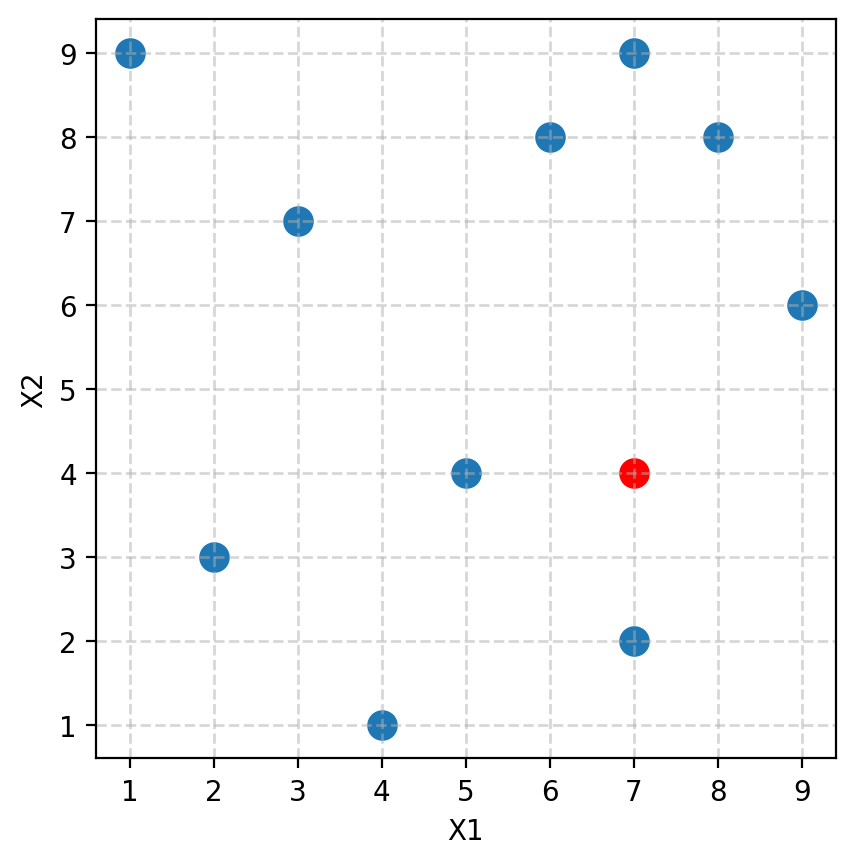

In [65]:
X = np.array([[1, 9], [2, 3], [4, 1], [3, 7], [5, 4], [6, 8], [7, 2], [8, 8], [7, 9], [9, 6]])

query_pt = np.array([7, 4])

def plot_dataset():
    plt.scatter(X[:, 0], X[:, 1], s=100)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.grid(True, which='both', axis='both', linestyle='--', linewidth=1, alpha=0.5)
    plt.xticks(np.arange(min(X[:, 0]), max(X[:, 0])+1, 1))
    plt.yticks(np.arange(min(X[:, 1]), max(X[:, 1])+1, 1))
    
    plt.scatter(query_pt[0], query_pt[1], color='red', s=100)
    

plot_dataset()




In [66]:
# Exact 1NN from sklearn
from sklearn.neighbors import NearestNeighbors

k = 2
nbrs = NearestNeighbors(n_neighbors=k, algorithm='brute').fit(X)
distances, indices = nbrs.kneighbors([query_pt])

In [27]:

X[indices], distances

(array([[[5, 4],
         [7, 2]]]),
 array([[2., 2.]]))

In [28]:
def pairwise_dist_naive(x: np.ndarray, y: np.ndarray) -> float:
    """
    x: numpy array of shape (d,)
    y: numpy array of shape (d,)
    
    Returns the Euclidean distance between x and y
    """
    d = len(x)
    assert d == len(y)
    sqrd_distance = 0.0
    for i in range(d):
        sqrd_distance += (x[i] - y[i])**2
    return np.sqrt(sqrd_distance)

In [29]:
def pairwise_dist_numpy(x: np.ndarray, y: np.ndarray) -> float:
    """
    x: numpy array of shape (d,)
    y: numpy array of shape (d,)
    
    Returns the Euclidean distance between x and y
    """
    return np.sqrt(np.sum((x - y)**2))

In [30]:
def pairwise_dist_numpy_norm(x: np.ndarray, y: np.ndarray) -> float:
    """
    x: numpy array of shape (d,)
    y: numpy array of shape (d,)
    
    Returns the Euclidean distance between x and y
    """
    return np.linalg.norm(x - y)

In [31]:
pairwise_dist_naive(X[0], X[1]), pairwise_dist_numpy(X[0], X[1]), pairwise_dist_numpy_norm(X[0], X[1])

(6.082762530298219, 6.082762530298219, 6.082762530298219)

In [35]:
def distance_vector(X: np.ndarray, query_pt: np.ndarray) -> np.ndarray:
    """
    X: numpy array of shape (n, d)
    query_pt: numpy array of shape (d,)
    
    Returns the Euclidean distance between query_pt and each point in X
    """
    n, d = X.shape
    distances = np.zeros(n)
    """Write logic here"""
    
    return distances

In [ ]:
# Test that the function is correct by comparing to sklearn

In [39]:
# Find all distances from query_pt to all points in X using sklearn
nbrs = NearestNeighbors(n_neighbors=len(X), algorithm='brute').fit(X)
distances_sklearn, idxs_sklearn = nbrs.kneighbors([query_pt])
print(distances_sklearn)

[[2.         2.         2.82842712 4.12310563 4.12310563 4.24264069
  5.         5.         5.09901951 7.81024968]]

In [47]:
distances_sklearn[0, idxs_sklearn[0]]

array([4.12310563, 5.        , 7.81024968, 4.24264069, 5.        ,
       2.82842712, 4.12310563, 5.09901951, 2.        , 2.        ])

In [48]:
import pandas as pd

df = pd.DataFrame(X, columns=['X1', 'X2'])
df["query_distance"] = distances_sklearn[0, idxs_sklearn[0]]
df

In [49]:
### LSH with Random Projections



In [181]:
### Random Projections

P = 3
np.random.seed(35)
R = np.random.randn(X.shape[1] + 1, P)  # why +1?

In [182]:
R

array([[-1.88973671, -0.41359218, -0.76602601],
       [-0.92412667, -1.42159783,  0.80525599],
       [ 1.14886176,  1.1694284 , -0.80200928]])

In [183]:
# For now, make R[:, 2] =1 to make it easier to plot
R[:, 2] = 1
R

array([[-1.88973671, -0.41359218,  1.        ],
       [-0.92412667, -1.42159783,  1.        ],
       [ 1.14886176,  1.1694284 ,  1.        ]])

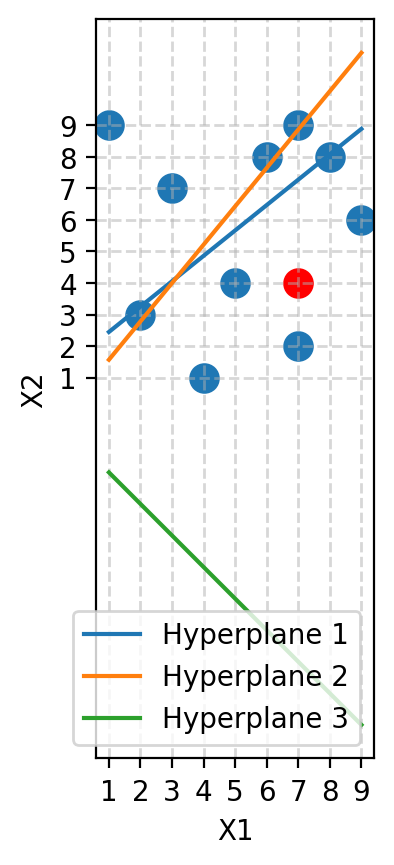

In [184]:
plot_dataset()

# Plot hyperplanes
for i in range(P):
    x1 = np.array([min(X[:, 0]), max(X[:, 0])])
    x2 = (-R[0, i] - R[1, i]*x1) / R[2, i]
    plt.plot(x1, x2, label=f'Hyperplane {i+1}')
plt.legend()

In [185]:
X_aug = np.hstack([ np.ones((X.shape[0], 1)), X])
X_aug

array([[1., 1., 9.],
       [1., 2., 3.],
       [1., 4., 1.],
       [1., 3., 7.],
       [1., 5., 4.],
       [1., 6., 8.],
       [1., 7., 2.],
       [1., 8., 8.],
       [1., 7., 9.],
       [1., 9., 6.]])

In [186]:
X_aug @ R

array([[ 7.52589247,  8.68966556, 11.        ],
       [-0.29140476,  0.25149734,  6.        ],
       [-4.43738162, -4.93055512,  6.        ],
       [ 3.37991562,  3.5076131 , 11.        ],
       [-1.914923  , -2.84386777, 10.        ],
       [ 1.75639738,  0.41224799, 15.        ],
       [-6.06089985, -8.02592023, 10.        ],
       [-0.09185596, -2.43094768, 17.        ],
       [ 1.98113247,  0.16007855, 17.        ],
       [-3.31370614, -6.19140231, 16.        ]])

In [187]:
np.sign(X_aug @ R)

array([[ 1.,  1.,  1.],
       [-1.,  1.,  1.],
       [-1., -1.,  1.],
       [ 1.,  1.,  1.],
       [-1., -1.,  1.],
       [ 1.,  1.,  1.],
       [-1., -1.,  1.],
       [-1., -1.,  1.],
       [ 1.,  1.,  1.],
       [-1., -1.,  1.]])